In [ ]:
pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import json
import pandas as pd
from tqdm import tqdm
import os

import IPython.display
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import librosa
import pydub
import pickle as pickle
import librosa.display
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout,Flatten, Conv2D, MaxPooling2D,LSTM, TimeDistributed, Convolution1D, MaxPooling1D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import Callback

import tensorflow as tf
from tensorflow.keras import backend as K
import keras





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
wav_path = "/content/drive/My Drive/accentdata"
wav_filenames = os.listdir(wav_path)
ex_wav_filenames = wav_filenames[0]
ex_wav_filenames
eg_wave, eg_sr = librosa.load(wav_path + "/" +ex_wav_filenames, mono=True )

In [ ]:
file_name_mfcc = []
for filename in tqdm(wav_filenames):
  wave, sr = librosa.load(wav_path+ "/" +filename, mono = True)
  mfcc = librosa.feature.mfcc(y=wave, sr = sr)
  file_name_mfcc.append([filename, wave, mfcc, sr])




100%|██████████| 662/662 [02:33<00:00,  4.32it/s]


In [ ]:
data = pd.DataFrame(data = file_name_mfcc, columns = ["filename", "wav", "mfcc", "sr"])

In [ ]:
data

,filename,wav,mfcc,sr
0,igbo91.wav,"[0.12788561, 0.16963689, 0.054908704, -0.04077...","[[-107.81684, -123.302864, -150.63849, -156.15...",22050
1,igbo102.wav,"[0.026923971, 0.036769062, -0.00013287933, -0....","[[-279.8276, -235.11525, -179.63089, -143.5203...",22050
2,yoruba250.wav,"[0.018155307, 0.026333354, 0.019969577, 0.0206...","[[-392.26627, -306.9462, -226.50438, -187.9869...",22050
3,yoruba361.wav,"[0.058746487, 0.0874564, 0.06950038, 0.0669236...","[[-272.15494, -262.68542, -276.19376, -243.048...",22050
4,yoruba98.wav,"[0.043925084, 0.057802264, 0.018163802, -0.010...","[[-245.23903, -261.71207, -282.54337, -273.279...",22050
...,...,...,...,...
657,yoruba363.wav,"[-0.13565159, -0.028213754, 0.18824653, -0.022...","[[-388.35233, -409.13602, -462.55835, -493.872...",22050
658,yoruba303.wav,"[-0.025613483, -0.04062547, -0.037113406, -0.0...","[[-309.43918, -259.55664, -235.32463, -229.364...",22050
659,yoruba34.wav,"[-0.02364207, 0.015536387, 0.0052080136, -0.00...","[[-317.34106, -287.14655, -252.37566, -220.180...",22050
660,igbo12.wav,"[0.038635306, 0.024735818, -0.045139037, -0.02...","[[-333.15192, -229.69794, -148.22176, -122.209...",22050


In [ ]:
data = data[["filename", "mfcc", "sr"]]

In [ ]:
data


,filename,mfcc,sr
0,igbo91.wav,"[[-107.81684, -123.302864, -150.63849, -156.15...",22050
1,igbo102.wav,"[[-279.8276, -235.11525, -179.63089, -143.5203...",22050
2,yoruba250.wav,"[[-392.26627, -306.9462, -226.50438, -187.9869...",22050
3,yoruba361.wav,"[[-272.15494, -262.68542, -276.19376, -243.048...",22050
4,yoruba98.wav,"[[-245.23903, -261.71207, -282.54337, -273.279...",22050
...,...,...,...
657,yoruba363.wav,"[[-388.35233, -409.13602, -462.55835, -493.872...",22050
658,yoruba303.wav,"[[-309.43918, -259.55664, -235.32463, -229.364...",22050
659,yoruba34.wav,"[[-317.34106, -287.14655, -252.37566, -220.180...",22050
660,igbo12.wav,"[[-333.15192, -229.69794, -148.22176, -122.209...",22050


In [ ]:
data = data.sort_values(by= "filename")

In [ ]:
data

,filename,mfcc,sr
351,hausa1.wav,"[[-146.01768, -153.39105, -210.3232, -242.0239...",22050
121,hausa10.wav,"[[-266.99124, -216.7935, -154.13612, -125.3139...",22050
545,hausa11.wav,"[[-403.10678, -398.43338, -292.63303, -202.575...",22050
486,hausa12.wav,"[[-427.7325, -421.71292, -389.26068, -342.0095...",22050
612,hausa13.wav,"[[-142.56625, -116.10384, -96.849174, -91.2646...",22050
...,...,...,...
566,yoruba95.wav,"[[-376.32935, -385.9099, -411.8818, -432.94998...",22050
452,yoruba96.wav,"[[-189.76833, -158.44206, -149.4194, -149.6400...",22050
97,yoruba97.wav,"[[-261.9663, -255.17252, -238.89098, -165.0040...",22050
4,yoruba98.wav,"[[-245.23903, -261.71207, -282.54337, -273.279...",22050


AttributeError: ignored

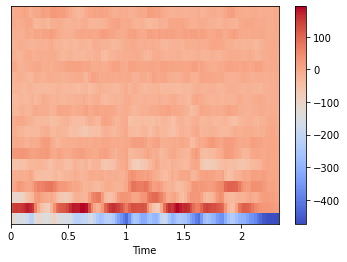

In [ ]:
librosa.display.specshow(data["mfcc"][0], x_axis = "time")
plt.colorbar()
plt.tight.layout()
plt.title("mfcc")
plt.show

AttributeError: ignored

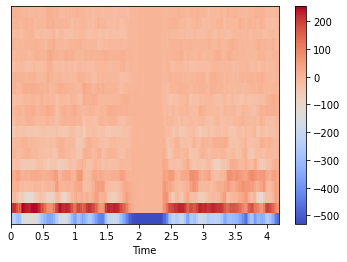

In [ ]:
librosa.display.specshow(data["mfcc"][189], x_axis = "time")
plt.colorbar()
plt.tight.layout()
plt.title("mfcc")
plt.show

In [ ]:
data["native_language"] = data["filename"].str[:-4]

In [ ]:
data

,filename,mfcc,sr,native_language
351,hausa1.wav,"[[-146.01768, -153.39105, -210.3232, -242.0239...",22050,hausa1
121,hausa10.wav,"[[-266.99124, -216.7935, -154.13612, -125.3139...",22050,hausa10
545,hausa11.wav,"[[-403.10678, -398.43338, -292.63303, -202.575...",22050,hausa11
486,hausa12.wav,"[[-427.7325, -421.71292, -389.26068, -342.0095...",22050,hausa12
612,hausa13.wav,"[[-142.56625, -116.10384, -96.849174, -91.2646...",22050,hausa13
...,...,...,...,...
566,yoruba95.wav,"[[-376.32935, -385.9099, -411.8818, -432.94998...",22050,yoruba95
452,yoruba96.wav,"[[-189.76833, -158.44206, -149.4194, -149.6400...",22050,yoruba96
97,yoruba97.wav,"[[-261.9663, -255.17252, -238.89098, -165.0040...",22050,yoruba97
4,yoruba98.wav,"[[-245.23903, -261.71207, -282.54337, -273.279...",22050,yoruba98


In [ ]:
data["native_language"] = data.apply(lambda x: "".join([i for i in x["native_language"] if not i.isdigit()]), axis = 1)

In [ ]:
data

,filename,mfcc,sr,native_language
351,hausa1.wav,"[[-146.01768, -153.39105, -210.3232, -242.0239...",22050,hausa
121,hausa10.wav,"[[-266.99124, -216.7935, -154.13612, -125.3139...",22050,hausa
545,hausa11.wav,"[[-403.10678, -398.43338, -292.63303, -202.575...",22050,hausa
486,hausa12.wav,"[[-427.7325, -421.71292, -389.26068, -342.0095...",22050,hausa
612,hausa13.wav,"[[-142.56625, -116.10384, -96.849174, -91.2646...",22050,hausa
...,...,...,...,...
566,yoruba95.wav,"[[-376.32935, -385.9099, -411.8818, -432.94998...",22050,yoruba
452,yoruba96.wav,"[[-189.76833, -158.44206, -149.4194, -149.6400...",22050,yoruba
97,yoruba97.wav,"[[-261.9663, -255.17252, -238.89098, -165.0040...",22050,yoruba
4,yoruba98.wav,"[[-245.23903, -261.71207, -282.54337, -273.279...",22050,yoruba


In [ ]:
data["flag"] = data['native_language'].replace(['hausa', 'igbo', 'yoruba'],
                        [0, 1, 2])

In [ ]:
# data["flag"] = keras.utils.np_utils.to_categorical(data["flag"])

In [ ]:
data["flag"]

351    0
121    0
545    0
486    0
612    0
      ..
566    2
452    2
97     2
4      2
118    2
Name: flag, Length: 662, dtype: int64

In [ ]:
data[0:150]

,filename,mfcc,sr,native_language,flag
351,hausa1.wav,"[[-146.01768, -153.39105, -210.3232, -242.0239...",22050,hausa,0
121,hausa10.wav,"[[-266.99124, -216.7935, -154.13612, -125.3139...",22050,hausa,0
545,hausa11.wav,"[[-403.10678, -398.43338, -292.63303, -202.575...",22050,hausa,0
486,hausa12.wav,"[[-427.7325, -421.71292, -389.26068, -342.0095...",22050,hausa,0
612,hausa13.wav,"[[-142.56625, -116.10384, -96.849174, -91.2646...",22050,hausa,0
...,...,...,...,...,...
151,igbo66.wav,"[[-323.22736, -345.23242, -395.4946, -403.0901...",22050,igbo,1
364,igbo67.wav,"[[-214.762, -204.7917, -213.01703, -253.72974,...",22050,igbo,1
536,igbo68.wav,"[[-216.04024, -185.62881, -161.64117, -180.334...",22050,igbo,1
579,igbo69.wav,"[[-369.1259, -404.56317, -488.12302, -503.3538...",22050,igbo,1


In [ ]:
MFCC_MAX_LEN = 0
for arr in data["mfcc"]:
  if arr.shape[1] > MFCC_MAX_LEN:
    MFCC_MAX_LEN = arr.shape[1]

MFCC_MAX_LEN

402

In [ ]:
MFCC_NUM = 0
for arr in data["mfcc"]:
  if arr.shape[0] > MFCC_NUM:
      MFCC_NUM = arr.shape[0]

MFCC_NUM

20

In [ ]:
def resize_mfcc(df,MFCC_MAX_LEN):
    df["padded_mfcc"] = df.apply(lambda x: librosa.util.fix_length(data = x["mfcc"],size = MFCC_MAX_LEN,axis = 1), axis = 1)
    return df
df = resize_mfcc(data,MFCC_MAX_LEN)

In [ ]:
# from sklearn.utils import shuffle
# data = shuffle(data)
# data.head()

In [ ]:
train_data, test_data = train_test_split(data, test_size = 0.1, random_state=123)
# val_data, test_data = train_test_split(rest_data, test_size = 0.6, random_state=123)

In [ ]:
train_data

,filename,mfcc,sr,native_language,flag,padded_mfcc
296,yoruba402.wav,"[[-318.84854, -350.7151, -393.344, -437.14383,...",22050,yoruba,2,"[[-318.84854, -350.7151, -393.344, -437.14383,..."
294,yoruba139.wav,"[[-258.6981, -258.6952, -266.51077, -283.432, ...",22050,yoruba,2,"[[-258.6981, -258.6952, -266.51077, -283.432, ..."
263,igbo64.wav,"[[-117.623634, -96.15651, -88.76206, -115.4543...",22050,igbo,1,"[[-117.623634, -96.15651, -88.76206, -115.4543..."
300,yoruba414.wav,"[[-157.14984, -175.58667, -290.64725, -429.294...",22050,yoruba,2,"[[-157.14984, -175.58667, -290.64725, -429.294..."
534,yoruba54.wav,"[[-363.2624, -329.57016, -294.67303, -246.2331...",22050,yoruba,2,"[[-363.2624, -329.57016, -294.67303, -246.2331..."
...,...,...,...,...,...,...
288,hausa34.wav,"[[-343.55002, -372.27695, -440.4884, -481.7140...",22050,hausa,0,"[[-343.55002, -372.27695, -440.4884, -481.7140..."
539,igbo72.wav,"[[-268.89374, -226.41603, -164.54085, -136.126...",22050,igbo,1,"[[-268.89374, -226.41603, -164.54085, -136.126..."
381,yoruba440.wav,"[[-117.679596, -111.080414, -114.39842, -118.2...",22050,yoruba,2,"[[-117.679596, -111.080414, -114.39842, -118.2..."
649,yoruba209.wav,"[[-379.46283, -380.46063, -393.23755, -409.461...",22050,yoruba,2,"[[-379.46283, -380.46063, -393.23755, -409.461..."


In [ ]:
test_data


,filename,mfcc,sr,native_language,flag,padded_mfcc
330,yoruba126.wav,"[[-362.62933, -380.67096, -400.13974, -410.134...",22050,yoruba,2,"[[-362.62933, -380.67096, -400.13974, -410.134..."
502,yoruba122.wav,"[[-331.8846, -300.4599, -223.5737, -159.86462,...",22050,yoruba,2,"[[-331.8846, -300.4599, -223.5737, -159.86462,..."
94,yoruba386.wav,"[[-192.0356, -248.58807, -404.11334, -452.0071...",22050,yoruba,2,"[[-192.0356, -248.58807, -404.11334, -452.0071..."
329,igbo84.wav,"[[-333.56433, -290.76633, -239.75958, -201.459...",22050,igbo,1,"[[-333.56433, -290.76633, -239.75958, -201.459..."
158,yoruba346.wav,"[[-184.18854, -165.52151, -154.41199, -115.703...",22050,yoruba,2,"[[-184.18854, -165.52151, -154.41199, -115.703..."
...,...,...,...,...,...,...
122,yoruba1.wav,"[[-421.53424, -431.82156, -451.23434, -460.430...",22050,yoruba,2,"[[-421.53424, -431.82156, -451.23434, -460.430..."
84,igbo55.wav,"[[-283.55344, -239.73827, -192.80992, -121.497...",22050,igbo,1,"[[-283.55344, -239.73827, -192.80992, -121.497..."
236,yoruba114.wav,"[[-276.77338, -320.33267, -419.44897, -505.515...",22050,yoruba,2,"[[-276.77338, -320.33267, -419.44897, -505.515..."
148,yoruba26.wav,"[[-326.06833, -323.3792, -280.97012, -266.9718...",22050,yoruba,2,"[[-326.06833, -323.3792, -280.97012, -266.9718..."


In [ ]:
test_data

,filename,mfcc,sr,native_language,flag,padded_mfcc
330,yoruba126.wav,"[[-362.62933, -380.67096, -400.13974, -410.134...",22050,yoruba,2,"[[-362.62933, -380.67096, -400.13974, -410.134..."
502,yoruba122.wav,"[[-331.8846, -300.4599, -223.5737, -159.86462,...",22050,yoruba,2,"[[-331.8846, -300.4599, -223.5737, -159.86462,..."
94,yoruba386.wav,"[[-192.0356, -248.58807, -404.11334, -452.0071...",22050,yoruba,2,"[[-192.0356, -248.58807, -404.11334, -452.0071..."
329,igbo84.wav,"[[-333.56433, -290.76633, -239.75958, -201.459...",22050,igbo,1,"[[-333.56433, -290.76633, -239.75958, -201.459..."
158,yoruba346.wav,"[[-184.18854, -165.52151, -154.41199, -115.703...",22050,yoruba,2,"[[-184.18854, -165.52151, -154.41199, -115.703..."
...,...,...,...,...,...,...
122,yoruba1.wav,"[[-421.53424, -431.82156, -451.23434, -460.430...",22050,yoruba,2,"[[-421.53424, -431.82156, -451.23434, -460.430..."
84,igbo55.wav,"[[-283.55344, -239.73827, -192.80992, -121.497...",22050,igbo,1,"[[-283.55344, -239.73827, -192.80992, -121.497..."
236,yoruba114.wav,"[[-276.77338, -320.33267, -419.44897, -505.515...",22050,yoruba,2,"[[-276.77338, -320.33267, -419.44897, -505.515..."
148,yoruba26.wav,"[[-326.06833, -323.3792, -280.97012, -266.9718...",22050,yoruba,2,"[[-326.06833, -323.3792, -280.97012, -266.9718..."


In [ ]:
x_train = np.array(list(train_data["padded_mfcc"]))
# x_val = np.array(list(val_data["padded_mfcc"]))
x_test = np.array(list(test_data["padded_mfcc"]))

In [ ]:
y_train = train_data["flag"]
# y_val = val_data["flag"]
y_test= test_data["flag"]

In [ ]:
y_train = tf.one_hot(y_train, depth=3)
# y_val = tf.one_hot(y_val, depth=3)
y_test = tf.one_hot(y_test, depth=3)


In [ ]:
y_train

<tf.Tensor: shape=(595, 3), dtype=float32, numpy=
array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)>

In [ ]:
feature_dim_1 = MFCC_NUM
feature_dim_2 = MFCC_MAX_LEN
channel = 1


In [ ]:
x_train_reshaped = x_train.reshape(x_train.shape[0], feature_dim_1,feature_dim_2,channel)
# x_val_reshaped = x_val.reshape(x_val.shape[0], feature_dim_1,feature_dim_2,channel)
x_test_reshaped = x_test.reshape(x_test.shape[0], feature_dim_1,feature_dim_2,channel)


In [ ]:
MFCC_MAX_LEN

402

In [ ]:
# model.add(LSTM(64, return_sequences=True, stateful=False,
#                batch_input_shape= (3, x_train_reshaped.shape[1], x_train_reshaped.shape[2])))
# model.add(LSTM(64, return_sequences=True, stateful=False))
# model.add(LSTM(64, stateful=False))

In [ ]:
model = Sequential()
model.add(Conv2D(32, (2,2), input_shape =(feature_dim_1,feature_dim_2,channel)))
model.add(Activation("relu"))

# model.add(TimeDistributed(Conv2D(32, (2,2))))
# model.add(TimeDistributed(Activation("relu")))
# model.add(TimeDistributed(MaxPooling2D(pool_size = (2,2))))

model.add(Conv2D(32, (2,2)))
model.add(Activation("relu"))

model.add(Conv2D(64, (3,3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Dropout(0.5))

# model.add(TimeDistributed(Flatten()))
# model.add(TimeDistributed(Dense(64)))
model.add(Activation("relu"))
# model.add(GlobalAveragePooling2D())


# model.add(Activation("sigmoid"))
model.add(TimeDistributed(Flatten()))

model.add(LSTM(19, dropout=0.1))
model.add(Dense(3, activation="sigmoid"))


# model.add(Activation("sigmoid"))

# model.add(LSTM(50, dropout=0.1))
# model.add(Dense(2, activation="sigmoid"))






In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 19, 401, 32)       160       
                                                                 
 activation_3 (Activation)   (None, 19, 401, 32)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 18, 400, 32)       4128      
                                                                 
 activation_4 (Activation)   (None, 18, 400, 32)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 398, 64)       18496     
                                                                 
 activation_5 (Activation)   (None, 16, 398, 64)       0         
                                                                 
 time_distributed_1 (TimeDis  (None, 16, 25472)       

In [ ]:

model.compile(loss = keras.losses.categorical_crossentropy, optimizer = tf.keras.optimizers.Adam(lr = 0.05),metrics=["Accuracy"])
history1 = model.fit(x_train_reshaped, y_train, batch_size =10 , epochs = 50, verbose = 1 )

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


60/60 [==============================] - 2s 12ms/step - loss: 0.7795 - Accuracy: 0.7210
Epoch 2/50
60/60 [==============================] - 1s 11ms/step - loss: 0.7464 - Accuracy: 0.7294
Epoch 3/50
60/60 [==============================] - 1s 10ms/step - loss: 0.7662 - Accuracy: 0.7092
Epoch 4/50
60/60 [==============================] - 1s 11ms/step - loss: 0.7287 - Accuracy: 0.7311
Epoch 5/50
60/60 [==============================] - 1s 10ms/step - loss: 0.7615 - Accuracy: 0.7025
Epoch 6/50
60/60 [==============================] - 1s 11ms/step - loss: 0.7591 - Accuracy: 0.7328
Epoch 7/50
60/60 [==============================] - 1s 11ms/step - loss: 0.7630 - Accuracy: 0.7227
Epoch 8/50
60/60 [==============================] - 1s 11ms/step - loss: 0.7392 - Accuracy: 0.7244
Epoch 9/50
60/60 [==============================] - 1s 11ms/step - loss: 0.7506 - Accuracy: 0.7328
Epoch 10/50
60/60 [==============================] - 1s 10ms/step - loss: 0.7331 - Accuracy: 0.7244
Epoch 11/50
60/60 [=

In [ ]:
import sklearn
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
report = classification_report(y_test, y_pred.round())
print(report)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.32      0.89      0.47        19
           2       0.69      1.00      0.81        46

   micro avg       0.51      0.94      0.66        67
   macro avg       0.34      0.63      0.43        67
weighted avg       0.56      0.94      0.69        67
 samples avg       0.53      0.94      0.67        67



In [ ]:
import matplotlib.pyplot as plt
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

KeyError: ignored